In [ ]:
# Code for Galaxies Assignemnt - 4

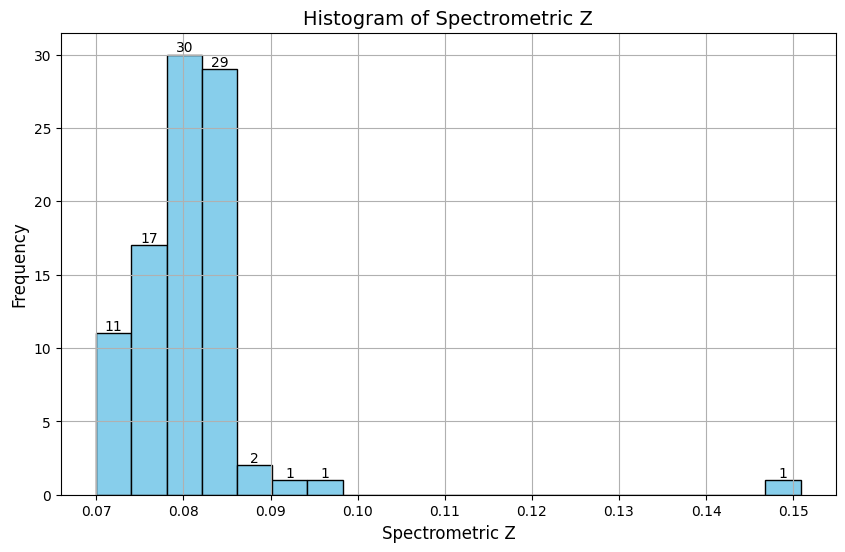

In [609]:
# importing the important packages
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/Users/kanishka.arora/Downloads/Skyserver_SQL4_7_2024 2_23_53 PM.csv')

# Access a specific column by its name
spectrometric_z = df['specz']

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(spectrometric_z, bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of Spectrometric Z', fontsize=14)
plt.xlabel('Spectrometric Z', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)

# Annotate each bar with its frequency
for i in range(len(n)):
    if n[i] != 0:
        plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, n[i], str(int(n[i])), ha='center', va='bottom')

plt.show()

In [610]:
# Calculating the cluster redshift from the data in the csv file

cluster_z = 0
sum_z = 0
n=len(spectrometric_z)

for i in spectrometric_z:
    if 0.07<=i<=0.1:        # Taking this range to be a cluater
        sum_z += i

cluster_z = sum_z/n

print("The cluster redshit is:",cluster_z)

The cluster redshit is: 0.0784329370652174


The values of velcity dispersions in km/sec [1113.8743830092733, 773.3307413666374, 313.4444784688834, 668.8922198019422, 1702.6769329622584, -458.47504082305016, 1340.250884698285, 1204.931294063956, 1010.7880313003051, -320.1574946822315, 1251.5192324982518, 249.7837327702546, 1093.1408699970511, -1341.2919241204493, -889.2526019966174, -667.6866239011466, 1191.5055922633228, -509.1812471908999, 1358.1528775339707, 1575.339907956302, -135.9304528883392, 1720.2530480869557, -178.6519550199399, -451.9463087420941, 4660.184382722565, 1194.6066537234362, 1191.824006313444, -2003.1162819255699, -2360.5898463252133, 43.311147720981914, 19459.828248803125, 382.58610738044496, -1247.1139625731153, 1399.2467248711123, -1261.0351427432643, -1384.128825577743, 2336.947690065462, 1212.1353494341417, 1992.9375266839863, 1211.1912460420936, 1159.0477214416796, 284.92907182316094, 1660.5386586119687, 1227.666942716407, -1235.8312145019595, 1376.5048287983052, -1266.0348648018557, 2468.1947399938754

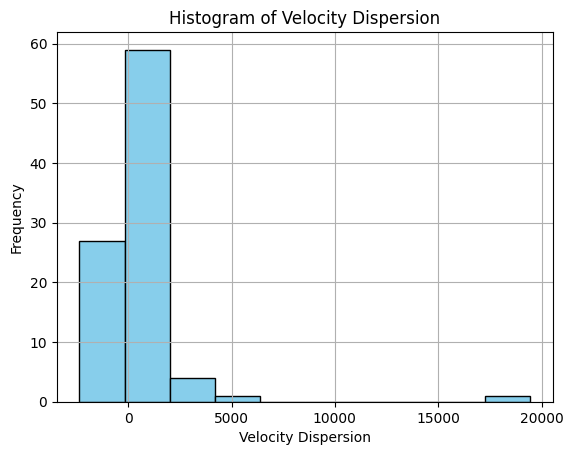

In [611]:
# Calculating the velocity dispersion of galaxies in the cluster

velocity_dispersion = []
c = 299792.458 # Speed of light in kilometre

for i in spectrometric_z:
    velocity_dispersion.append(c*(((1+i)**2 - (1+cluster_z)**2)/((1+i)**2 + (1+cluster_z)**2)))

print("The values of velcity dispersions in km/sec", velocity_dispersion)

# Plotting the velocity dispersions as a histogram
plt.hist(velocity_dispersion, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Velocity Dispersion')
plt.ylabel('Frequency')
plt.title('Histogram of Velocity Dispersion')
plt.grid(True)
plt.show()

In [612]:
# Calculating the characteristic average ealocity dispersion value

import math

sum = 0
count = 0

for i in range(len(velocity_dispersion)):
    if velocity_dispersion[i] <= 15000:
        sum += velocity_dispersion[i] ** 2
        count += 1

sigma = math.sqrt(sum / count) 

print("Estimate for the characteristic velocity dispersion of galaxies that belong to the cluster",sigma, "km/sec")


Estimate for the characteristic velocity dispersion of galaxies that belong to the cluster 1292.8673387416886 km/sec


In [613]:
# Calculating the new arrays which contain galaxies with velocities less than 1000 km/sec
spectrometric_z_new = []
velocity_dispersion_new = []

for i in range(len(velocity_dispersion)):
    if abs(velocity_dispersion[i]) <= 1000:
        spectrometric_z_new.append(spectrometric_z[i])
        velocity_dispersion_new.append(velocity_dispersion[i])

# Filter out zeros from the arrays
spectrometric_z_new = [z for z in spectrometric_z_new if z != 0]
velocity_dispersion_new = [v for v in velocity_dispersion_new if v != 0]

# Print the new lists
print("New spectrometric_z:", spectrometric_z_new)
print("New velocity_dispersion:", velocity_dispersion_new)
print(len(spectrometric_z_new))

New spectrometric_z: [0.08121841, 0.07956107, 0.08084181, 0.07678494, 0.07728186, 0.07933185, 0.07523879, 0.07603376, 0.07660283, 0.07794407, 0.07779047, 0.07680839, 0.07858875, 0.07981008, 0.07945839, 0.07830062, 0.07503507, 0.07971801, 0.07901837, 0.07967802, 0.0809986, 0.07837883, 0.07617816, 0.08137539, 0.080997, 0.08127932, 0.07843956, 0.07682644, 0.07765399, 0.0792056, 0.08157108, 0.08092269, 0.07704972, 0.0798867, 0.0761909, 0.08112399, 0.07766051, 0.0785919, 0.08195051, 0.08079002, 0.08089872]
New velocity_dispersion: [773.3307413666374, 313.4444784688834, 668.8922198019422, -458.47504082305016, -320.1574946822315, 249.7837327702546, -889.2526019966174, -667.6866239011466, -509.1812471908999, -135.9304528883392, -178.6519550199399, -451.9463087420941, 43.311147720981914, 382.58610738044496, 284.92907182316094, -36.78494076156447, -946.0575964190983, 357.0232543325665, 162.69972352529345, 345.9195162959354, 712.3775851563722, -15.041544481741523, -627.4584023715263, 816.85356015

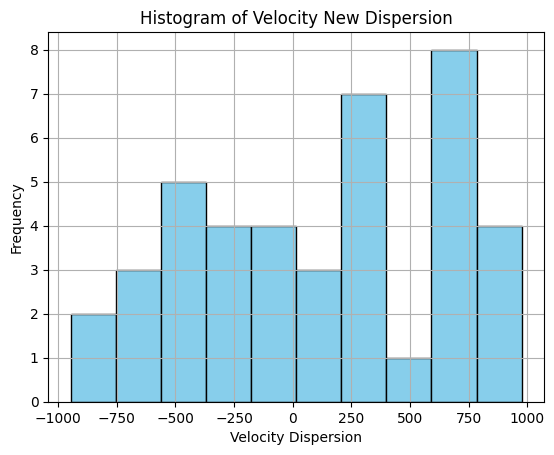

In [614]:
# Plotting the histogram of the new Velocity distribution

plt.hist(velocity_dispersion_new, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Velocity Dispersion')
plt.ylabel('Frequency')
plt.title('Histogram of Velocity New Dispersion')
plt.grid(True)
plt.show()

In [615]:
# To calculate the seperation between galaxies

import math

separation = []

# Read the CSV file
df = pd.read_csv('/Users/kanishka.arora/Downloads/Skyserver_SQL4_7_2024 2_23_53 PM.csv')

# Access RA and Dec columns
ra = df['ra']
dec = df['dec']

# Calculate separation for each pair of coordinates
for i in range(len(spectrometric_z_new)):
    for j in range(i+1, n):  # Avoid duplicate pairs
        # Calculate angular separation using haversine formula
        delta_ra = math.radians(ra[j] - ra[i])
        delta_dec = math.radians(dec[j] - dec[i])
        separation.append(2*math.asin(math.sqrt((math.asin(delta_dec/2)**2)) + math.cos(dec[j])*math.cos(dec[i])*(math.sin(delta_ra/2)**2)))

# Now, the separation list contains the separation angles between all pairs of celestial objects


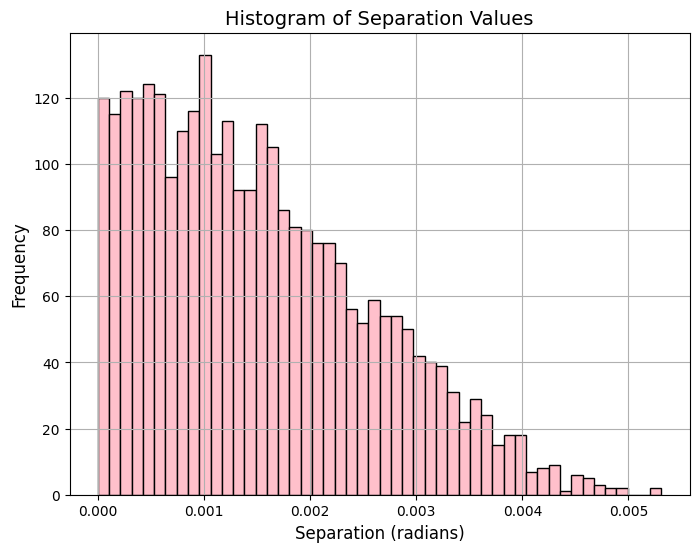

In [616]:
# Plot histogram of separation values

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
histogram_data = plt.hist(separation, bins=50, color='pink', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of Separation Values', fontsize=14)
plt.xlabel('Separation (radians)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

In [617]:
# Extract bin edges and find the end point on the x-axis

bin_edges = histogram_data[1]
end_point_x = bin_edges[-1]

print("End point on the x-axis:", end_point_x, "radians")

# We take 80% of the delta theta full like mentioned in class.
delta_theta = 0.8 * end_point_x
print("80 percent of the delta theta full: ",delta_theta, "radians")

End point on the x-axis: 0.005310614297590699 radians
80 percent of the delta theta full:  0.004248491438072559 radians


In [618]:
import numpy as np
from scipy.integrate import quad


# Now we define all the necessary functions required
# Or0 = Omega Radiation
# Om0 = Omega Matter
# Ol0 = Omega lamda
# Ho = Hubble Constant

# Defining the important constants

Ho = 2.2683 * (10**(-18))
radiation_density = 8.4 * 10**-5
matter_density = 0.3
dark_energy_density = 1 - radiation_density - matter_density 
# Flat universe Omega_0 = 1

def integrand(z, density_parameters):
    Or0, Om0, Ol0 = density_parameters
    return (1 / np.sqrt((Or0 * (1 + z)**4) + (Om0 * (1 + z)**3) + Ol0))

density_parameters = radiation_density, matter_density, dark_energy_density
Integrand = quad(lambda x: integrand(x, density_parameters), 0, cluster_z)[0]

angular_diameter_distance = ((c * Integrand)/((1 + cluster_z)*Ho)) 
# This gives the angular diameter distance

print("The angular diameter distance is: ",angular_diameter_distance/(3.086*(10**19)), "Mpc")

The angular diameter distance is:  305.89594217202875 Mpc


In [619]:
# To estimate the characteristic size of the cluster in Mpc

r = delta_theta * angular_diameter_distance
r = r * (3.2408e-20)
print("The size of the cluster is :",r, "Mpc")

The size of the cluster is : 1.2997403904957778 Mpc


In [620]:
# Estimating the Dynamical mass of the galaxy cluster

sum = 0

for i in range(len(velocity_dispersion_new)):
    sum = sum + (velocity_dispersion_new[i]**2)
    
Velocity_Dispersion = math.sqrt(sum/(len(velocity_dispersion_new))) 

print("Characteristic velocity dispersion(rms) of galaxies within the cluster (considering galaxies belown 1000km/sec): ", Velocity_Dispersion, "km/sec")

G = 6.6743 * (10**(-17))            # Gravitational Constant
c = 299792.458                      # Speed of light
M = 1.989 * (10**30)                # Unit of 1 solar mass

estimated_mass = ((((3 *(Velocity_Dispersion ** 2)) * ((r/2) * 3.086*(10**22))))/(G))
 
print("The estimated mass of the galaxy is:", estimated_mass/(M*(10**14)), "x 10^14 solar masses")

Characteristic velocity dispersion(rms) of galaxies within the cluster (considering galaxies belown 1000km/sec):  542.2436229373544 km/sec
The estimated mass of the galaxy is: 1.3325766392229241 x 10^14 solar masses
